<a href="https://colab.research.google.com/github/elchape99/AI2/blob/main/Important_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evasion exercise

In this notebook, you will use SecML to implement adversarial attacks against a given neural network.
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zangobot/teaching_material/blob/HEAD/extra-EvasionExercise.ipynb)

In [ ]:
# foolbox is tool that give me the instrument for do an attack to M.L. model
try:
    import secml
except ImportError:
    %pip install secml[foolbox]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.0/464.0 kB 22.4 MB/s eta 0:00:00


In [ ]:
# deep neual network model
# pytorch is the tool usefull for doing this
import torch
from torch import nn
from torch import optim
from secml.ml.classifiers import CClassifierPyTorch

random_state = 999


# creation of the multiclass classifier
class Net(nn.Module):
    def __init__(self, n_features, n_hidden, n_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, n_hidden)
        self.fc2 = nn.Linear(n_hidden, n_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x)) #relu activatio function, piece-wise linear function
        x = self.fc2(x)
        return x


n_features = 2
n_classes = 3

# torch model creation
net = Net(n_features=n_features, n_classes=n_classes, n_hidden=100)

loss_function = nn.CrossEntropyLoss() # define the loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# wrap torch model in CClassifierPyTorch class
clf = CClassifierPyTorch(model=net,
                         loss=loss_function,
                         optimizer=optimizer,
                         input_shape=(n_features,),
                         random_state=random_state)

2024-12-18 17:35:13,669 - secml.settings - INFO - New `SECML_HOME_DIR` created: /root/secml-data
2024-12-18 17:35:13,669 - secml.settings - INFO - New `SECML_HOME_DIR` created: /root/secml-data


INFO:secml.settings:New `SECML_HOME_DIR` created: /root/secml-data


2024-12-18 17:35:13,680 - secml.settings - INFO - Default configuration file copied to: /root/secml-data/secml.conf
2024-12-18 17:35:13,680 - secml.settings - INFO - Default configuration file copied to: /root/secml-data/secml.conf


INFO:secml.settings:Default configuration file copied to: /root/secml-data/secml.conf


2024-12-18 17:35:13,698 - secml.settings - INFO - New `SECML_DS_DIR` created: /root/secml-data/datasets
2024-12-18 17:35:13,698 - secml.settings - INFO - New `SECML_DS_DIR` created: /root/secml-data/datasets


INFO:secml.settings:New `SECML_DS_DIR` created: /root/secml-data/datasets


2024-12-18 17:35:13,733 - secml.settings - INFO - New `SECML_MODELS_DIR` created: /root/secml-data/models
2024-12-18 17:35:13,733 - secml.settings - INFO - New `SECML_MODELS_DIR` created: /root/secml-data/models


INFO:secml.settings:New `SECML_MODELS_DIR` created: /root/secml-data/models


2024-12-18 17:35:13,764 - secml.settings - INFO - New `SECML_EXP_DIR` created: /root/secml-data/experiments
2024-12-18 17:35:13,764 - secml.settings - INFO - New `SECML_EXP_DIR` created: /root/secml-data/experiments


INFO:secml.settings:New `SECML_EXP_DIR` created: /root/secml-data/experiments


2024-12-18 17:35:13,783 - secml.settings - INFO - New `SECML_LOGS_DIR` created: /root/secml-data/logs
2024-12-18 17:35:13,783 - secml.settings - INFO - New `SECML_LOGS_DIR` created: /root/secml-data/logs


INFO:secml.settings:New `SECML_LOGS_DIR` created: /root/secml-data/logs


2024-12-18 17:35:13,810 - secml.settings - INFO - New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data
2024-12-18 17:35:13,810 - secml.settings - INFO - New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data


INFO:secml.settings:New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data


In [ ]:
n_features = 2  # number of features
n_samples = 1250  # number of samples
centers = [[-2, 0], [2, -2], [2, 2]]  # centers of the clusters
cluster_std = 0.8  # standard deviation of the clusters
n_classes = len(centers)  # number of classes

from secml.data.loader import CDLRandomBlobs

# for the part of the centers, I can pass a number to the function and itself it statiate 3 randomo center for the blobs, in this case I have te centers jet
# .load() is a constructor
dataset =  CDLRandomBlobs(n_samples, n_features, centers, cluster_std).load() # TODO  instantiate a CDLRandomBlobs dataset as done in previous tutorials

n_tr = 1000  # number of training set samples
n_ts = 250  # number of test set samples

# split in training and test
from secml.data.splitter import CTrainTestSplit

splitter = CTrainTestSplit(
    train_size=n_tr, test_size=n_ts, random_state=random_state)
tr, ts = splitter.split(dataset)

# normalize the data
from secml.ml.features import CNormalizerMinMax

nmz = CNormalizerMinMax()
tr.X = nmz.fit_transform(tr.X)
ts.X = nmz.transform(ts.X)


In [ ]:
# now we want to fit the data, the cassifiers is created jet
# X: CArray used for training with shape (n_samples, n_features)
# Y: CArray array with shape(n_samples) containing the class labels
# return the classified dataset
clf.fit(tr.X, tr.Y)  # TODO fit the classifier using SecML

y_pred, scores = clf.predict(ts.X, True) # TODO  compute predictions on test set

print(scores)

from secml.ml.peval.metrics import CMetricAccuracy, CMetricPrecision, CMetricRecall, CMetricF1

# compute metrics
accuracy = CMetricAccuracy().performance_score(y_true=ts.Y, y_pred=y_pred)

print("Accuracy on test set: {:.2%}".format(accuracy))
print("F1 on test set: {:.2%}".format(CMetricF1().performance_score(y_true=ts.Y, y_pred=y_pred)))
print("Recall on test set: {:.2%}".format(CMetricRecall().performance_score(y_true=ts.Y, y_pred=y_pred)))
print("Precision on test set: {:.2%}".format(CMetricPrecision().performance_score(y_true=ts.Y, y_pred=y_pred)))


CArray([[-2.244113 -1.988397  4.5222  ]
 [ 2.893408 -2.230184 -0.444686]
 [ 5.117709 -2.487745 -2.430151]
 ...
 [ 2.390287  1.133552 -3.294757]
 [-0.010771 -3.179956  3.458107]
 [-3.028856 -2.434707  5.776512]])
Accuracy on test set: 100.00%
F1 on test set: 100.00%
Recall on test set: 100.00%
Precision on test set: 100.00%


In [ ]:
# cell used for print
# we need to visualize the test set for out attack
# we print also the decision boundary of the model
%matplotlib inline
from secml.figure import CFigure

fig = CFigure()
fig.sp.plot_ds(ts)
fig.sp.plot_decision_regions(clf, plot_background=True,
                             n_grid_points=200)
fig.show()

In [ ]:
# import the attack we want to see
from secml.adv.attacks.evasion import CFoolboxPGDL1, CFoolboxPGDL2, CFoolboxPGDLinf

y_target = None
index = 0
x0, y0 = ts.X[index, :], ts.Y[index]

# Attack parameters
lb = 0  # lower bound of the input space
ub = 1  # upper bound of the input space
epsilon = 0.3 # perturbation budget
abs_stepsize = 0.01  # stepsize of th gradient descend
steps = 100  # number of iterations
# relative stepsize, percantage of perturbation that I want to use at each iteration, I can decide ot use this or the absolute abs_stepsize
# in our case we skip this parameter
# the second parametre is the target class I want to reach
pgd_attack = CFoolboxPGDL2(clf, 0, lb, ub, epsilon, abs_stepsize =abs_stepsize, steps=steps) # TODO: instantiate the CFoolboxPGDL2 to create an untargeted attack (y_target = None) against the trained clf

# the attack return 4 thinks:
# - y_adv_pred: predicted label after attack
# - adv_scores: scores (don't use usually)
# - adv_ds_pgd: dataset containing the adversarial example
# - opt_loss_val: optimization of the loss function ( don't use usually)
y_adv_pred, adv_scores , adv_ds_pgd, opt_loss_val = pgd_attack.run(x0, y0) # TODO: run the attack on the sample (x0, y0)

print("Original x0 label: ", y0.item())
print("Adversarial example label (PGD-L2): ", y_adv_pred.item())

Original x0 label:  2
Adversarial example label (PGD-L2):  0


In [ ]:
from secml.optim.constraints.c_constraint_l2 import CConstraintL2

fig = CFigure()
fig.sp.plot_path(pgd_attack.x_seq) #all the samples computed during atatck
fig.sp.plot_constraint(CConstraintL2(epsilon))
fig.sp.plot_ds(ts)
fig.sp.plot_decision_regions(clf, plot_background=True,
                             n_grid_points=50)

# Security Evaluations

Testing one single perturbation budget is not enough to understand the robustness of your machine learning classifier.
Hence, a fair analysis consists of a *security evaluation* of the model, by considering more perturbation budgets, and hence quantify the performance of the target systematically against stronger and stronger attacks.
To do so, we first set the number of parameters we want to test (in this case, `epsilons`) and we compute attacks by varying the perturbation size.

In [ ]:
epsilons = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7]# create list of epsilons to use in the security evaluation
robust_accuracies = []
metric = CMetricAccuracy()
# goal is to use all the ts, so use all the 30 samples
# for save-time try now to evaluate only one 10 samples
X, y = ts.X[:10, :], ts.Y[:10]

for eps in epsilons:
    # TODO: instantiate the CFoolboxPGDL2 to create an untargeted attack (y_target = None) against the trained clf
    # NOTE: security evaluation attack must to be untarget, so can reach all the class it wants
    # NOTE: use None ad the target atatch want to reach
    # NOTE: the attack for security evaluation mus not have random star, put the random_start = False, if not we will have a odd function
    # NOTE: remember that the parameters are very important to set for have a good security evaluation
    pgd_attack = pgd_attack = CFoolboxPGDL2(clf, # clf is the model, if use another model remember to change it
                                            None,
                                            lb, ub,
                                            epsilon,
                                            abs_stepsize=abs_stepsize,
                                            steps=100,
                                            random_start=False)
    y_adv_pred, _, _, _ = pgd_attack.run(X, y) # TODO: run the attack on the X, y set of samples
    accuracy = metric.performance_score(y, y_adv_pred)
    robust_accuracies.append(accuracy)

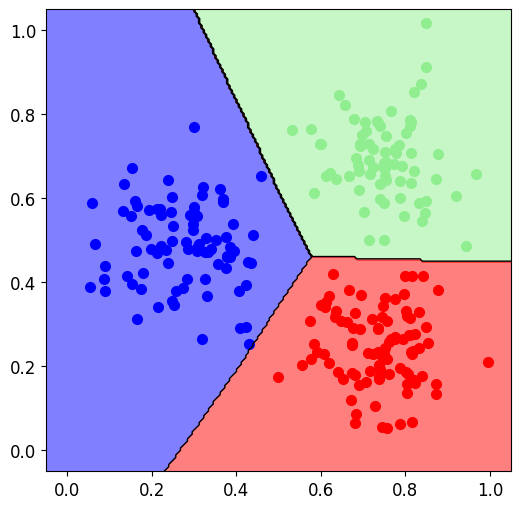

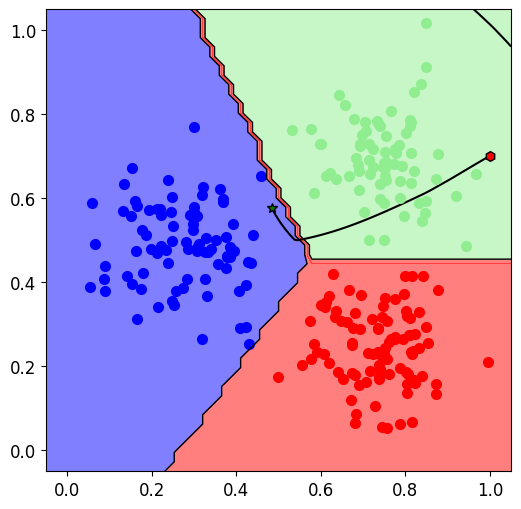

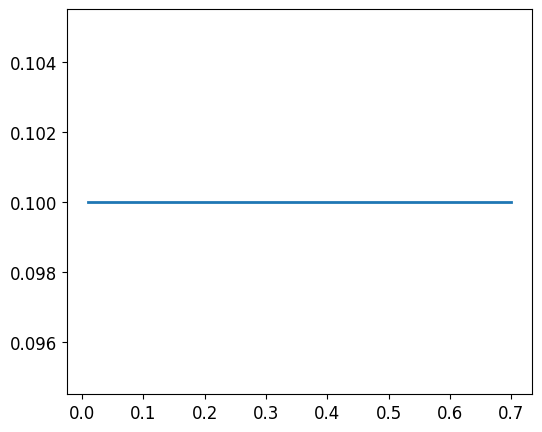

In [ ]:
%matplotlib inline
fig = CFigure(height=5, width=6)
fig.sp.plot(epsilons, robust_accuracies)
fig.show()